## Genetrating the POSCAR file from the supercell domain wall POSCAR file.

When you have $N\times N \times N$ supercell, you will have $N^3$ number of individual cells.

I also included the code to plot the atomic displacement along the z-direction (electric polarization direction) for Ti and Oxygen atoms.
However, I can extend to x- and y- direction as well to study not only Ising-type but also Bloch- and Neel- types as well

In [81]:
from pymatgen.io.vasp import Poscar
from pymatgen.io.vasp import Vasprun
from pymatgen.core.structure import Structure
import matplotlib.pyplot as plt
import scienceplots
import subprocess
import numpy as np

plt.style.use(['science','nature'])

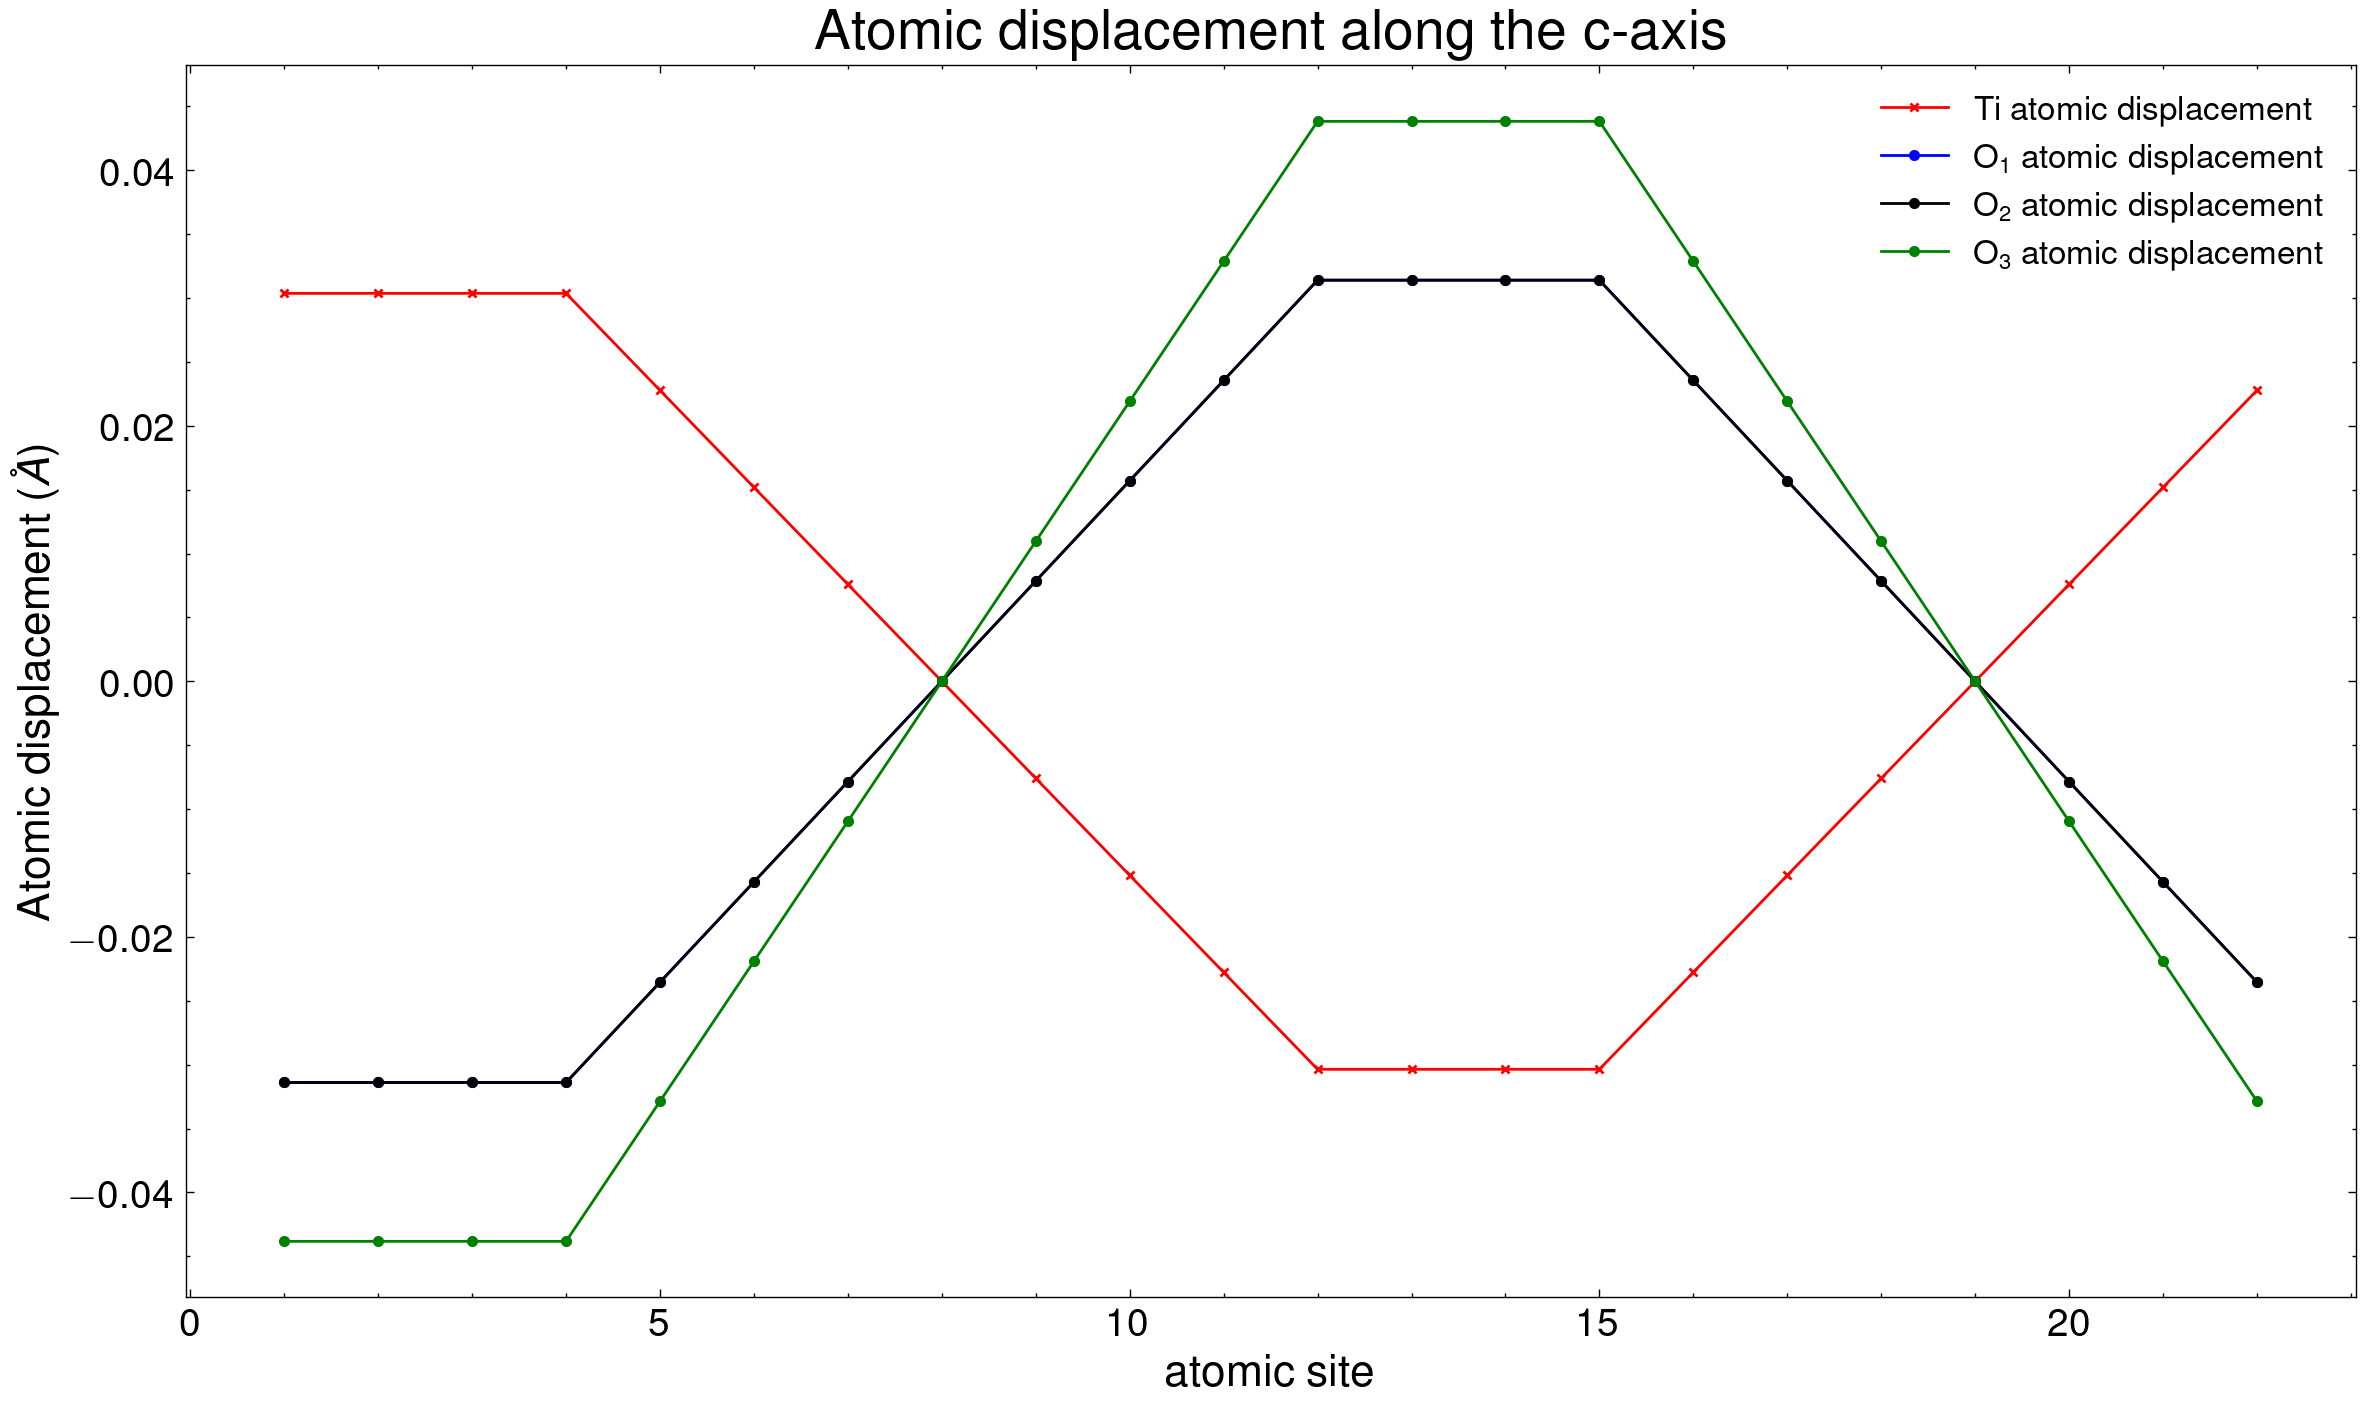

In [78]:
# Read the supercell POSCAR file
sup_poscar = Poscar.from_file('./files/POSCAR_super')
sup_struc = sup_poscar.structure

gen_POSCAR = False # Set it false if you only want to analyze the atomic displacement data
num_cell = 22 # Number of unit cells in the supercell
latt = np.array([[ 3.953265, 0, 0], # Tetragonal lattice parameters
                    [ 0, 3.953265, 0],
                    [ 0, 0, 3.970536]])

Ti_z_coord = []
O1_z_coord = []
O2_z_coord = []
O3_z_coord = []
atomic_site = np.arange(1, num_cell+1, 1)   

for i in range(num_cell):
    coord =  np.array([sup_struc.cart_coords[i] - [0, latt[1][1]*i, 0], # Ba
                       sup_struc.cart_coords[i+1*num_cell] - [0, latt[1][1]*i, 0], # Ti
                       sup_struc.cart_coords[i+2*num_cell] - [0, latt[1][1]*i, 0], # O1
                       sup_struc.cart_coords[i+3*num_cell] - [0, latt[1][1]*i, 0], # O2
                       sup_struc.cart_coords[i+4*num_cell] - [0, latt[1][1]*i, 0]]) # O3
    
    new_struc = Structure(lattice=latt, species=["Ba", "Ti", "O", "O", "O"], coords=coord, coords_are_cartesian=True)
    
    Ti_z_coord.append(new_struc.cart_coords[1][2] - latt[2][2]/2)
    O1_z_coord.append(new_struc.cart_coords[2][2] - latt[2][2]/2)
    O2_z_coord.append(new_struc.cart_coords[3][2] - latt[2][2]/2)
    if new_struc.cart_coords[4][2] > 3:
        O3_z_coord.append(new_struc.cart_coords[4][2] - latt[2][2])
    else:
        O3_z_coord.append(new_struc.cart_coords[4][2])    
    if gen_POSCAR == True:
        new_struc.to(filename='POSCAR_'f"{i+1:02d}")

xx = atomic_site
plt.figure(figsize=(14, 8), dpi=200)
plt.plot(xx, Ti_z_coord, '-xr',label='Ti atomic displacement')
plt.plot(xx, O1_z_coord, '-ob',label=r'O$_1$ atomic displacement')
plt.plot(xx, O2_z_coord, '-ok',label=r'O$_2$ atomic displacement')
plt.plot(xx, O3_z_coord, '-og',label=r'O$_3$ atomic displacement')
plt.xlabel('atomic site', fontsize=16)
plt.ylabel(r'Atomic displacement ($\AA$)', fontsize=16)
plt.title('Atomic displacement along the c-axis', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=12)
plt.show()

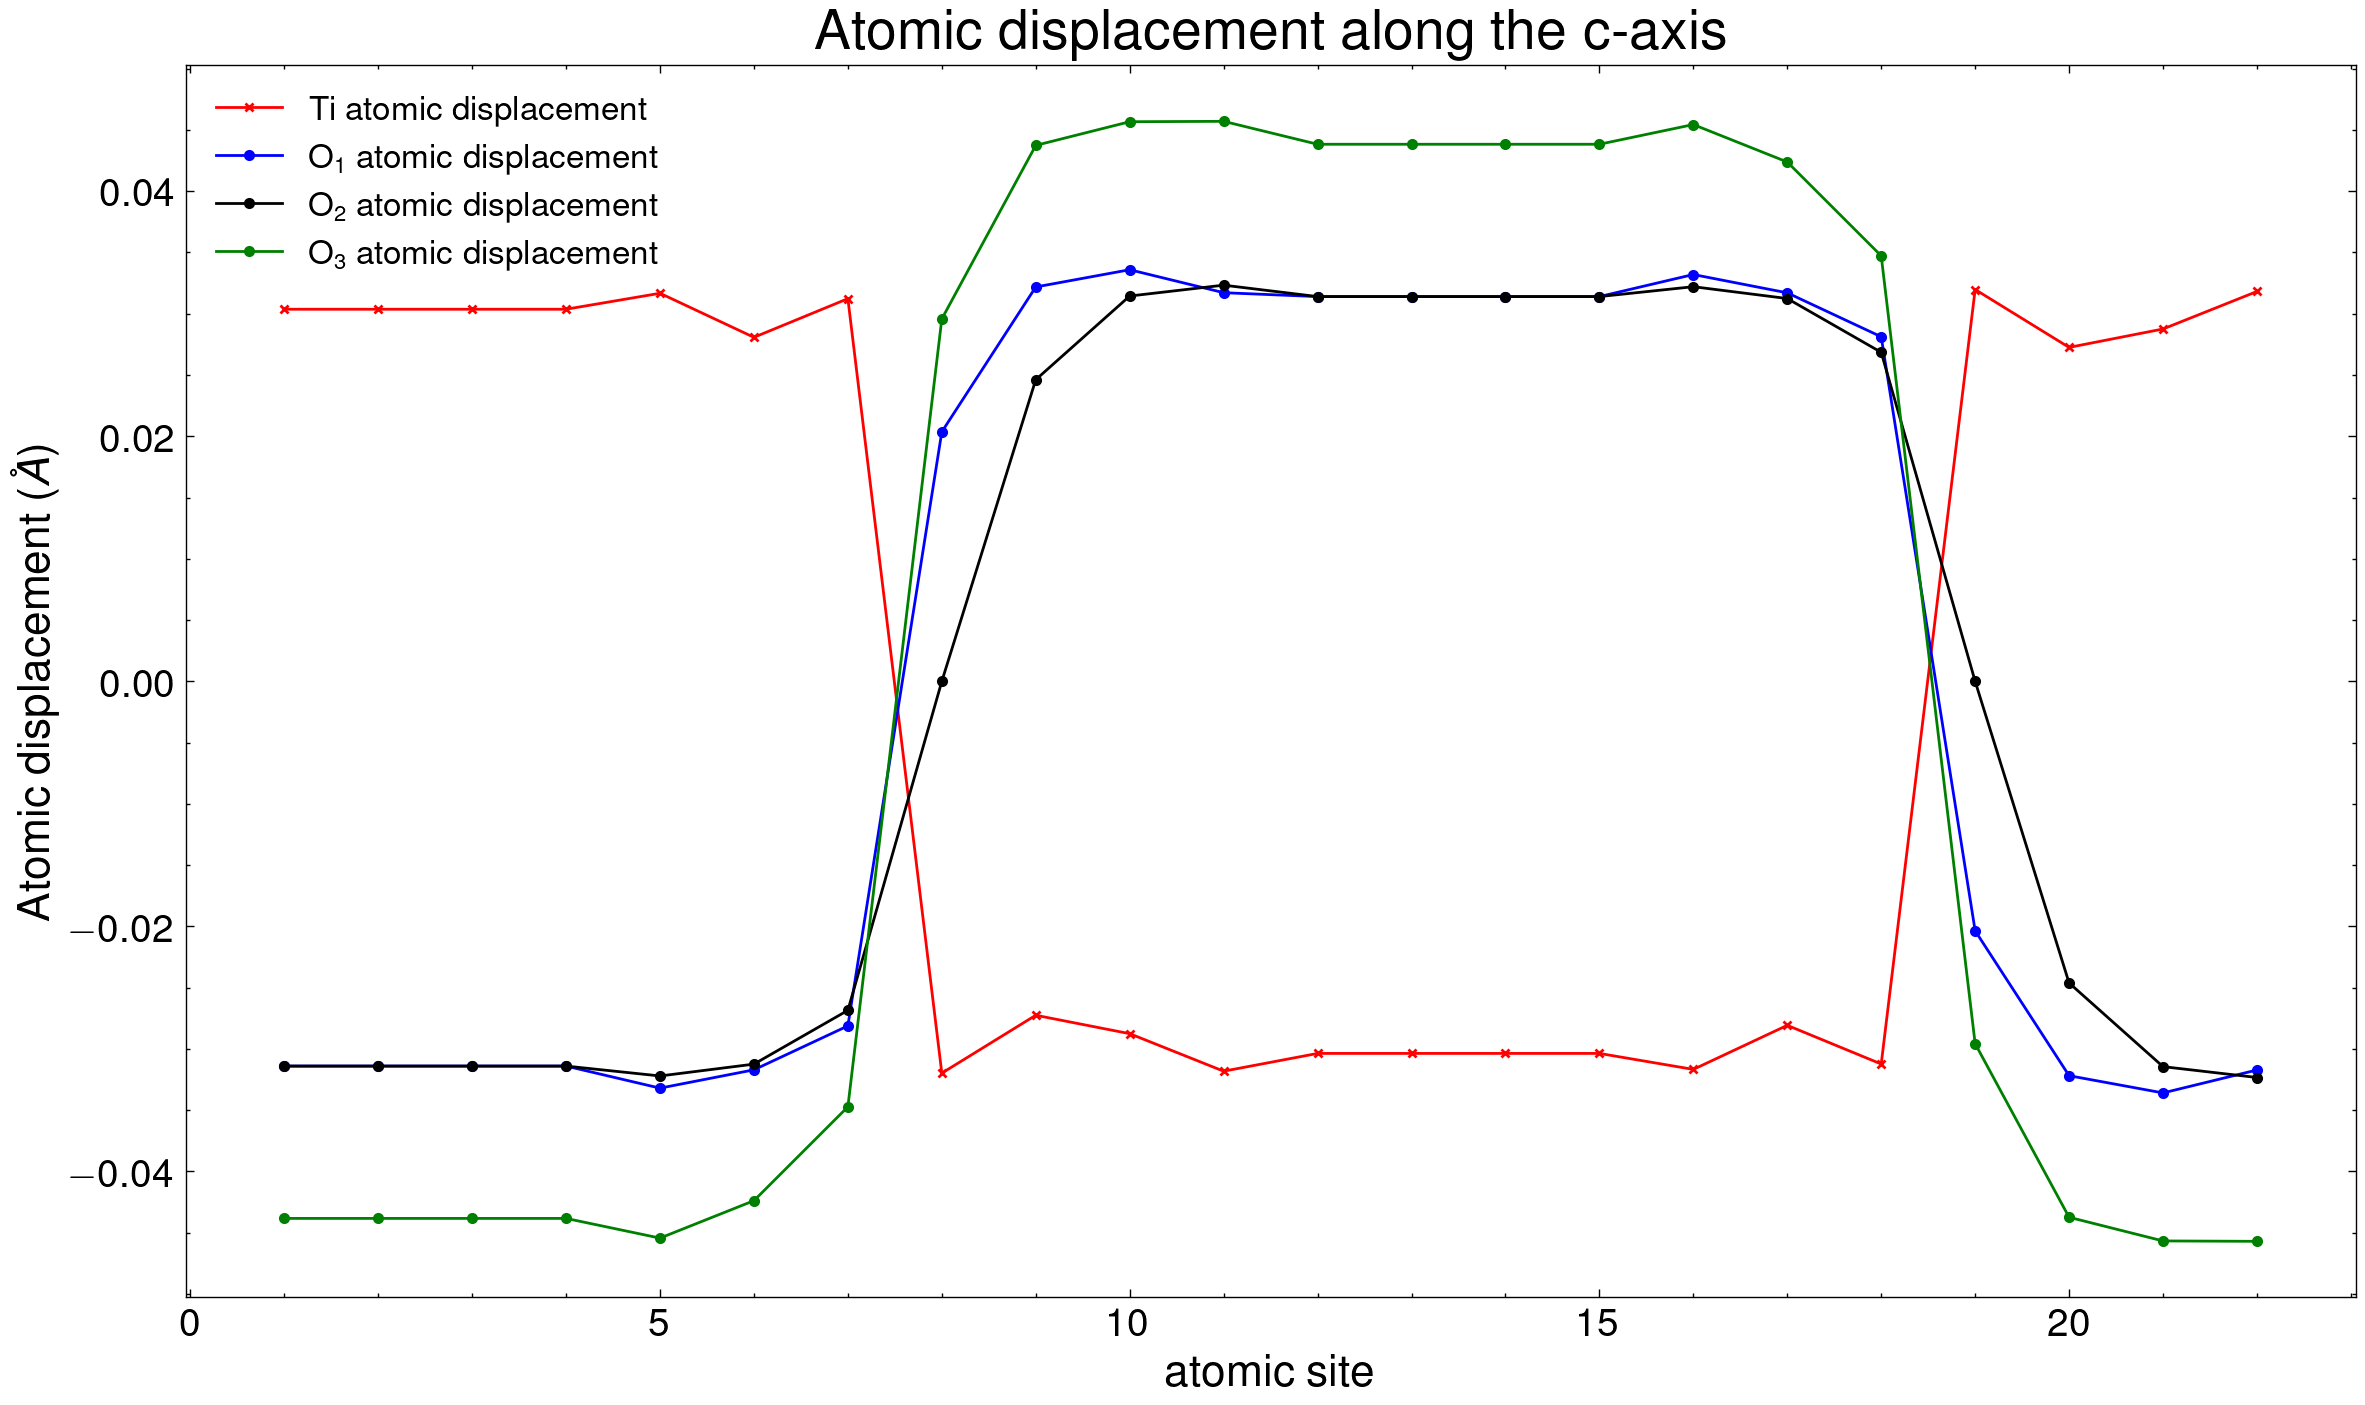

In [79]:
# Read the supercell POSCAR file
sup_poscar = Poscar.from_file('./files/POSCAR_super_Ising')
sup_struc = sup_poscar.structure

gen_POSCAR = True # Set it false if you only want to analyze the atomic displacement data
num_cell = 22 # Number of unit cells in the supercell
latt = np.array([[ 3.953265, 0, 0], # Tetragonal lattice parameters
                    [ 0, 3.953265, 0],
                    [ 0, 0, 3.970536]])

Ti_z_coord = []
O1_z_coord = []
O2_z_coord = []
O3_z_coord = []
atomic_site = np.arange(1, num_cell+1, 1)   

for i in range(num_cell):
    coord =  np.array([sup_struc.cart_coords[i] - [0, latt[1][1]*i, 0], # Ba
                       sup_struc.cart_coords[i+1*num_cell] - [0, latt[1][1]*i, 0], # Ti
                       sup_struc.cart_coords[i+2*num_cell] - [0, latt[1][1]*i, 0], # O1
                       sup_struc.cart_coords[i+3*num_cell] - [0, latt[1][1]*i, 0], # O2
                       sup_struc.cart_coords[i+4*num_cell] - [0, latt[1][1]*i, 0]]) # O3
    
    new_struc = Structure(lattice=latt, species=["Ba", "Ti", "O", "O", "O"], coords=coord, coords_are_cartesian=True)
    
    Ti_z_coord.append(new_struc.cart_coords[1][2] - latt[2][2]/2)
    O1_z_coord.append(new_struc.cart_coords[2][2] - latt[2][2]/2)
    O2_z_coord.append(new_struc.cart_coords[3][2] - latt[2][2]/2)
    if new_struc.cart_coords[4][2] > 3:
        O3_z_coord.append(new_struc.cart_coords[4][2] - latt[2][2])
    else:
        O3_z_coord.append(new_struc.cart_coords[4][2])    
    if gen_POSCAR == True:
        new_struc.to(filename='POSCAR_'f"{i+1:02d}")

xx = atomic_site
plt.figure(figsize=(14, 8), dpi=200)
plt.plot(xx, Ti_z_coord, '-xr',label='Ti atomic displacement')
plt.plot(xx, O1_z_coord, '-ob',label=r'O$_1$ atomic displacement')
plt.plot(xx, O2_z_coord, '-ok',label=r'O$_2$ atomic displacement')
plt.plot(xx, O3_z_coord, '-og',label=r'O$_3$ atomic displacement')
plt.xlabel('atomic site', fontsize=16)
plt.ylabel(r'Atomic displacement ($\AA$)', fontsize=16)
plt.title('Atomic displacement along the c-axis', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=12)
plt.show()

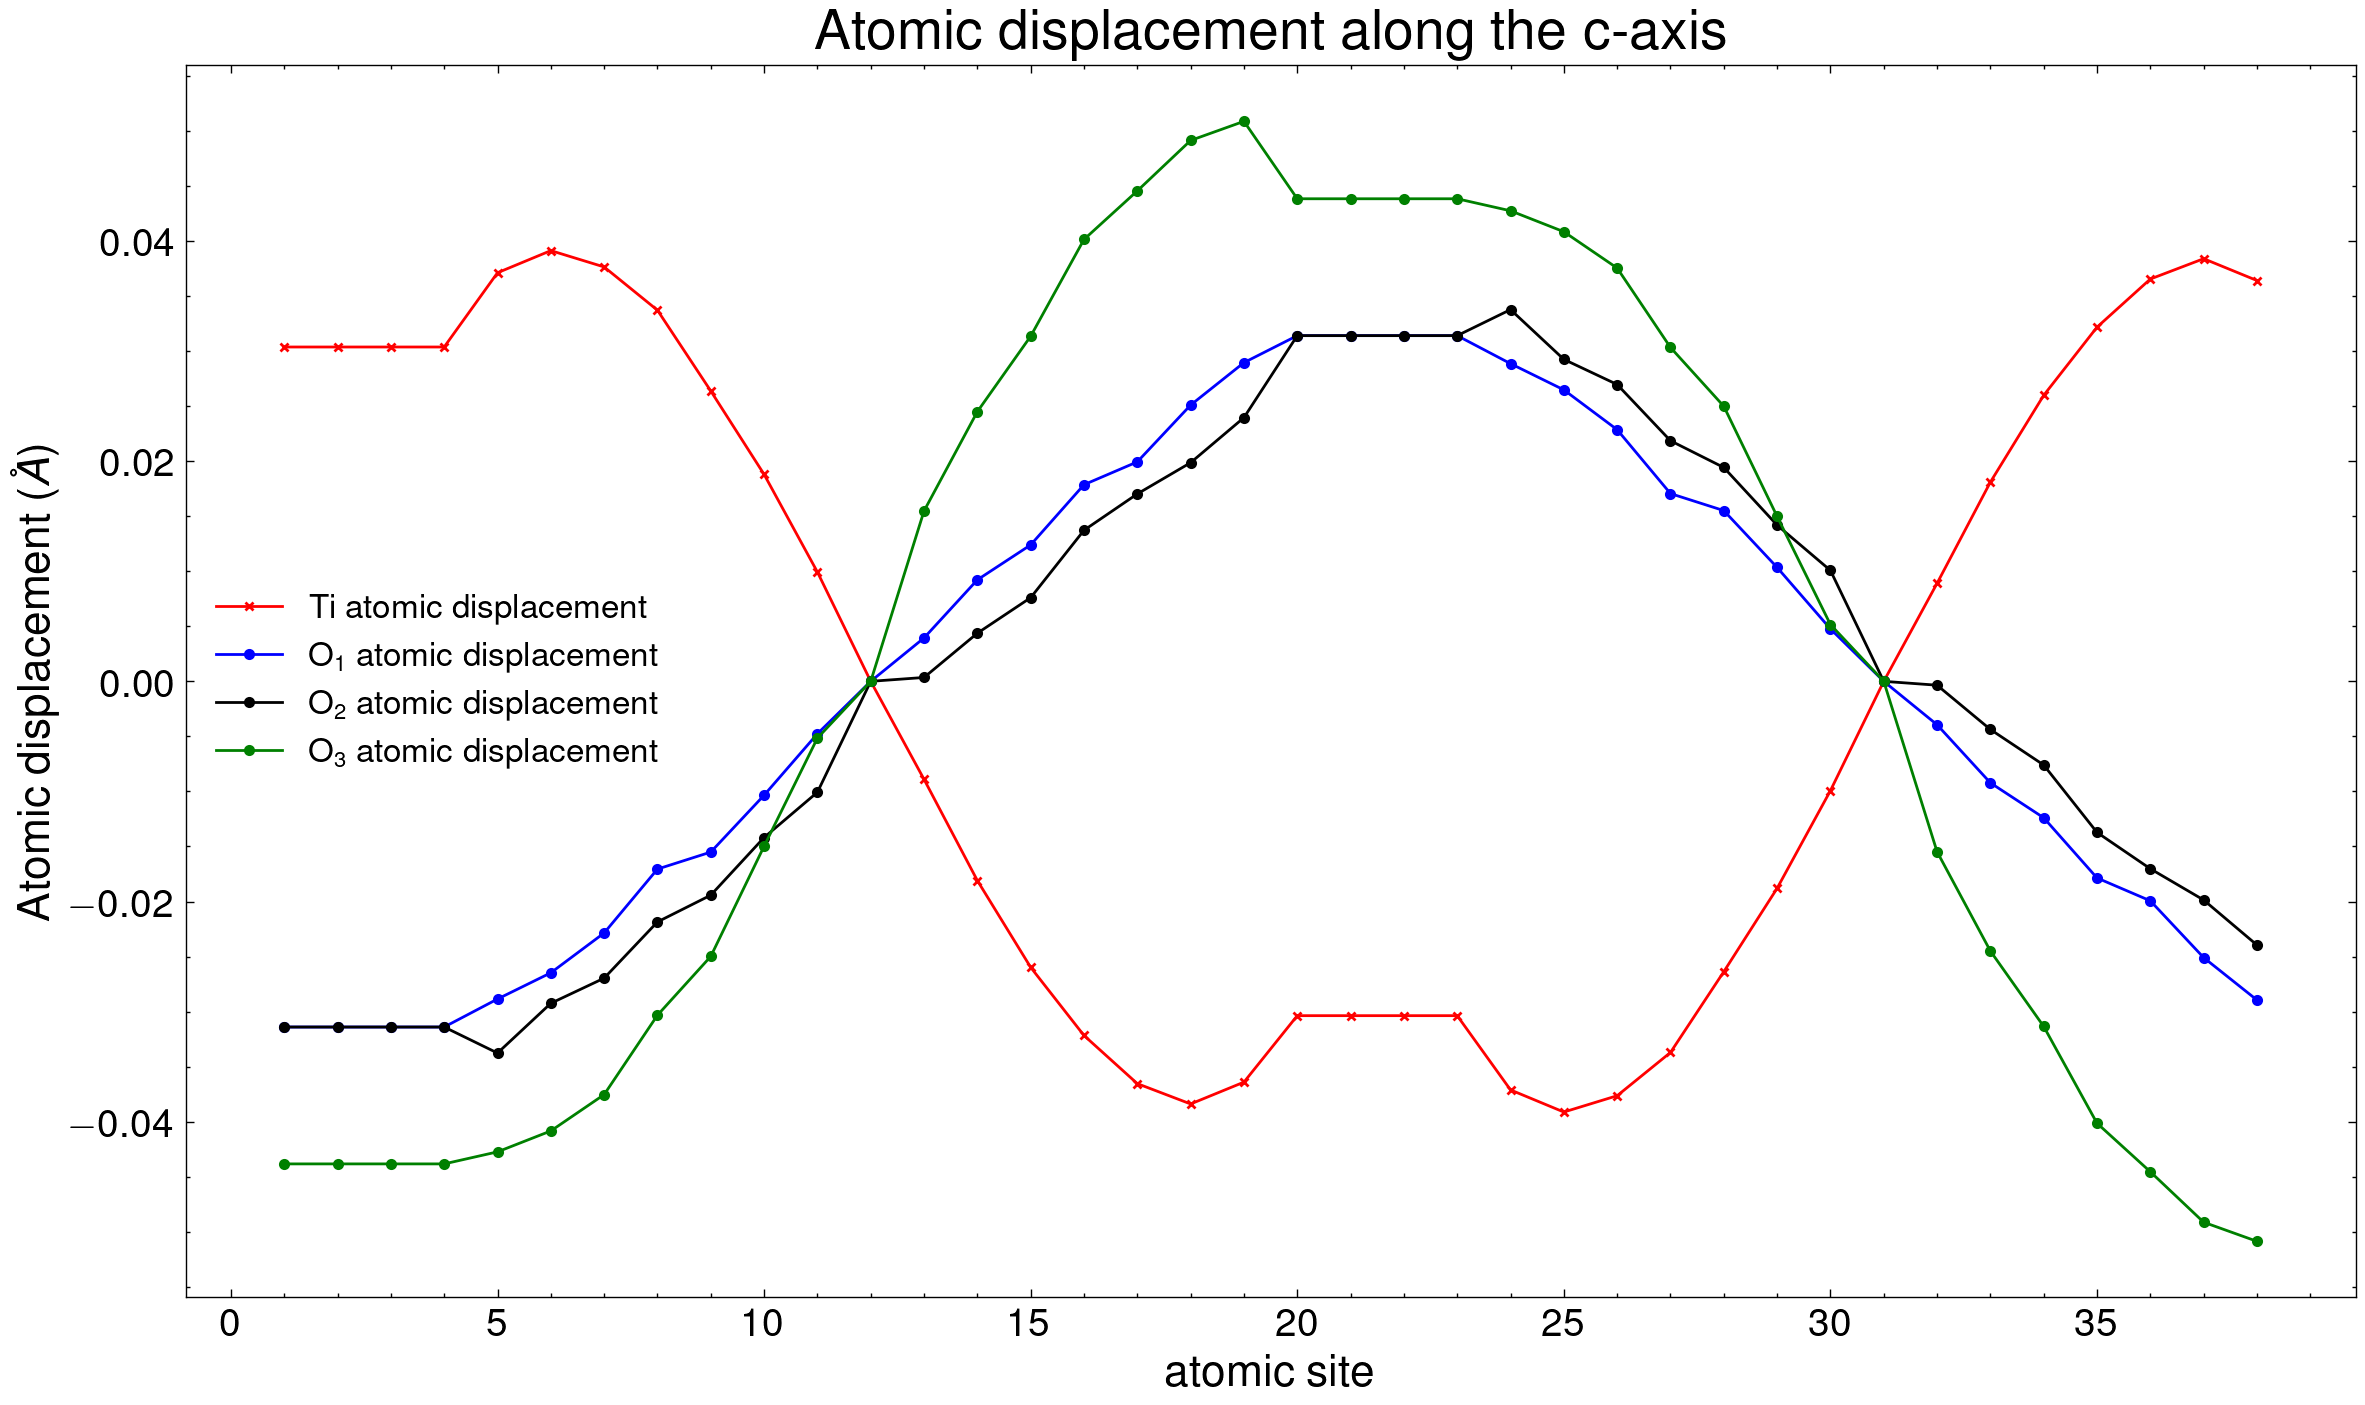

In [80]:
# Read the supercell POSCAR file
sup_poscar = Poscar.from_file('./files/POSCAR_super_15')
sup_struc = sup_poscar.structure

gen_POSCAR = False # Set it false if you only want to analyze the atomic displacement data
num_cell = 38 # Number of unit cells in the supercell
latt = np.array([[ 3.953265, 0, 0], # Tetragonal lattice parameters
                    [ 0, 3.953265, 0],
                    [ 0, 0, 3.970536]])

Ti_z_coord = []
O1_z_coord = []
O2_z_coord = []
O3_z_coord = []

for i in range(num_cell):
    coord =  np.array([sup_struc.cart_coords[i] - [0, latt[1][1]*i, 0], # Ba
                       sup_struc.cart_coords[i+1*num_cell] - [0, latt[1][1]*i, 0], # Ti
                       sup_struc.cart_coords[i+2*num_cell] - [0, latt[1][1]*i, 0], # O1
                       sup_struc.cart_coords[i+3*num_cell] - [0, latt[1][1]*i, 0], # O2
                       sup_struc.cart_coords[i+4*num_cell] - [0, latt[1][1]*i, 0]]) # O3
    
    new_struc = Structure(lattice=latt, species=["Ba", "Ti", "O", "O", "O"], coords=coord, coords_are_cartesian=True)
    
    Ti_z_coord.append(new_struc.cart_coords[1][2] - latt[2][2]/2)
    O1_z_coord.append(new_struc.cart_coords[2][2] - latt[2][2]/2)
    O2_z_coord.append(new_struc.cart_coords[3][2] - latt[2][2]/2)
    if new_struc.cart_coords[4][2] > 3:
        O3_z_coord.append(new_struc.cart_coords[4][2] - latt[2][2])
    else:
        O3_z_coord.append(new_struc.cart_coords[4][2])    
    if gen_POSCAR == True:
        new_struc.to(filename='POSCAR_'f"{i+1:02d}")

atomic_site = np.arange(1, num_cell+1, 1)   
xx = atomic_site
plt.figure(figsize=(14, 8), dpi=200)
plt.plot(xx, Ti_z_coord, '-xr',label='Ti atomic displacement')
plt.plot(xx, O1_z_coord, '-ob',label=r'O$_1$ atomic displacement')
plt.plot(xx, O2_z_coord, '-ok',label=r'O$_2$ atomic displacement')
plt.plot(xx, O3_z_coord, '-og',label=r'O$_3$ atomic displacement')
plt.xlabel('atomic site', fontsize=16)
plt.ylabel(r'Atomic displacement ($\AA$)', fontsize=16)
plt.title('Atomic displacement along the c-axis', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=12)
plt.show()

/Users/inhwankim/miniconda3/envs/myenv/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1106: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/inhwankim/Desktop/Code/dft_test/VASP/1.ChargeDensity/files/die/01
  warnings.warn(f"No POTCAR file with matching TITEL fields was found in {os.path.abspath(p)}")
/Users/inhwankim/miniconda3/envs/myenv/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1106: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/inhwankim/Desktop/Code/dft_test/VASP/1.ChargeDensity/files/die/02
  warnings.warn(f"No POTCAR file with matching TITEL fields was found in {os.path.abspath(p)}")
/Users/inhwankim/miniconda3/envs/myenv/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1106: UserWarning: No POTCAR file with matching TITEL fields was found in /Users/inhwankim/Desktop/Code/dft_test/VASP/1.ChargeDensity/files/die/03
  warnings.warn(f"No POTCAR file with matching TITEL fields was found in {os.path.

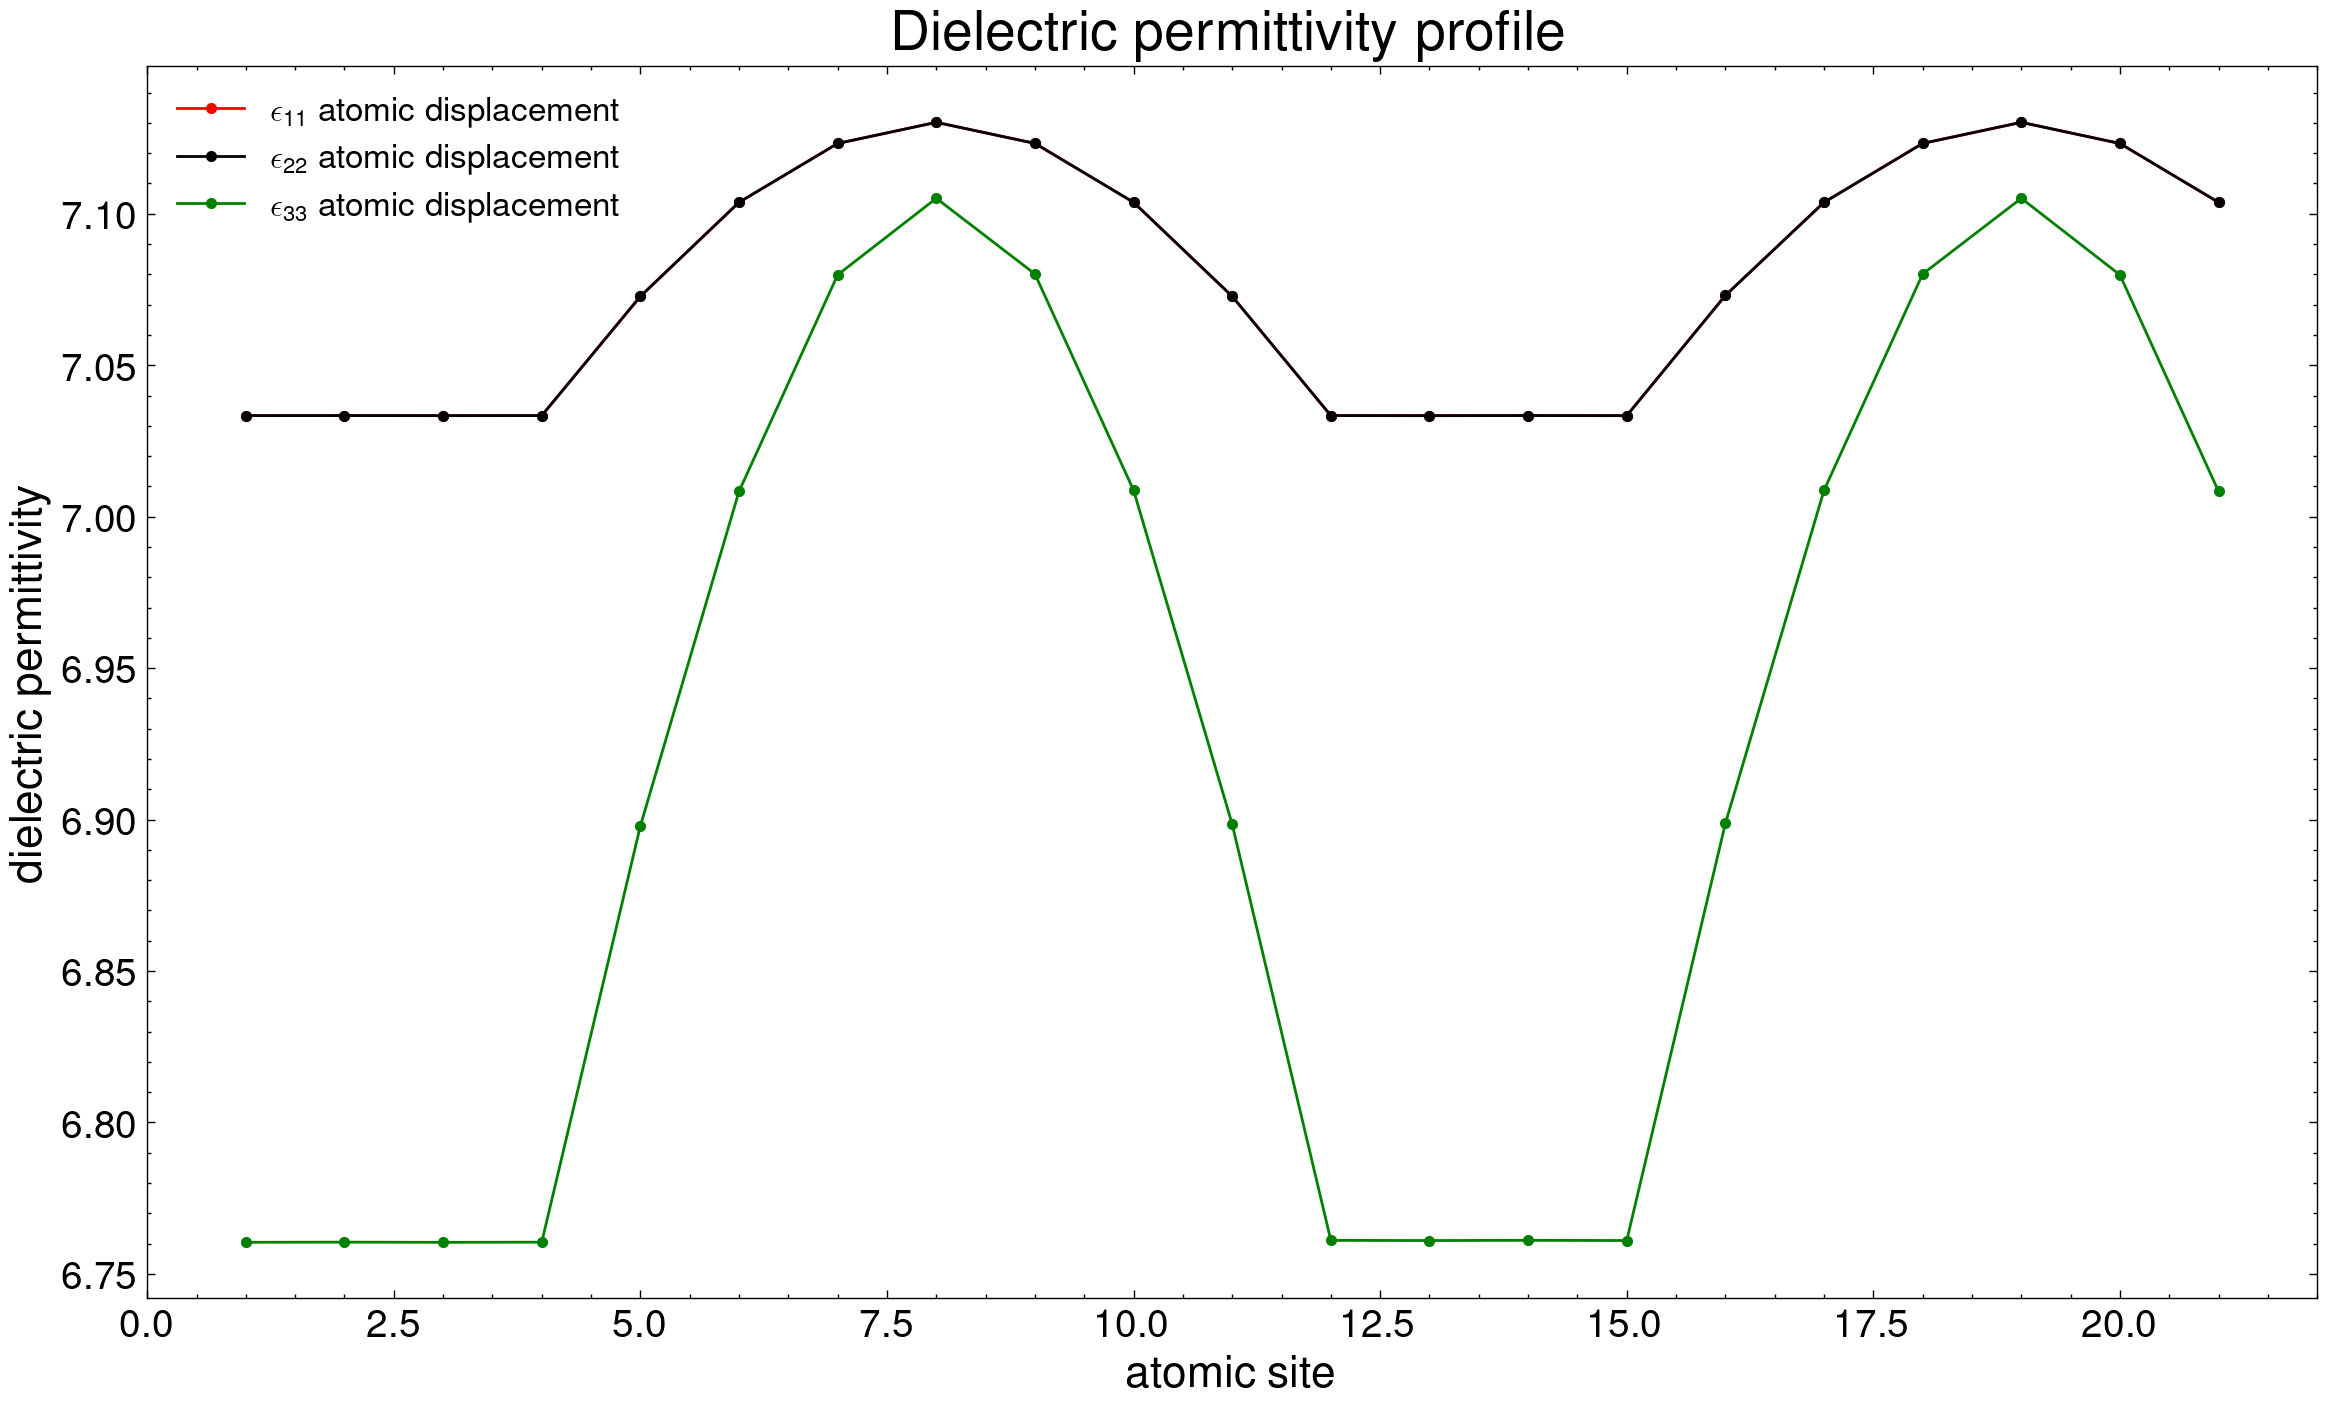

In [92]:
eps_1 = []
eps_2 = []
eps_3 = []
num_cell = 22

for i in range(1, num_cell):
    file_path = f'./files/die/{i:02d}/vasprun.xml'
    vrun = Vasprun(file_path)
    die_tensor = vrun.epsilon_static
    eps_1.append(die_tensor[0][0])
    eps_2.append(die_tensor[1][1])
    eps_3.append(die_tensor[2][2])

atomic_site = np.arange(1, num_cell, 1)   
xx = atomic_site
plt.figure(figsize=(14, 8), dpi=200)
plt.plot(xx, eps_1, '-or',label=r'$\epsilon _{11}$ atomic displacement')
plt.plot(xx, eps_2, '-ok',label=r'$\epsilon _{22}$ atomic displacement')
plt.plot(xx, eps_3, '-og',label=r'$\epsilon _{33}$ atomic displacement')
plt.xlabel('atomic site', fontsize=16)
plt.ylabel(r'dielectric permittivity', fontsize=16)
plt.title('Dielectric permittivity profile', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=12)
plt.show()


In [12]:
sup_struc.cart_coords[1]

array([0.        , 3.95330467, 0.        ])